In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.figure_factory as ff
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import RocCurveDisplay

In [322]:
df=pd.read_csv('/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [282]:
df2=df.copy()

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [284]:
train_dict=pd.DataFrame(df.dtypes,columns=['Data types'])
train_dict['null']=df.isnull().sum()
train_dict['unique vals']=df.nunique()
train_dict['count']=df.count()
train_dict

,Data types,null,unique vals,count
age,int64,0,41,303
sex,int64,0,2,303
cp,int64,0,4,303
trestbps,int64,0,49,303
chol,int64,0,152,303
fbs,int64,0,2,303
restecg,int64,0,3,303
thalach,int64,0,91,303
exang,int64,0,2,303
oldpeak,float64,0,40,303


In [285]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [286]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


feature distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18469f7bd0>,
      dtype=object)

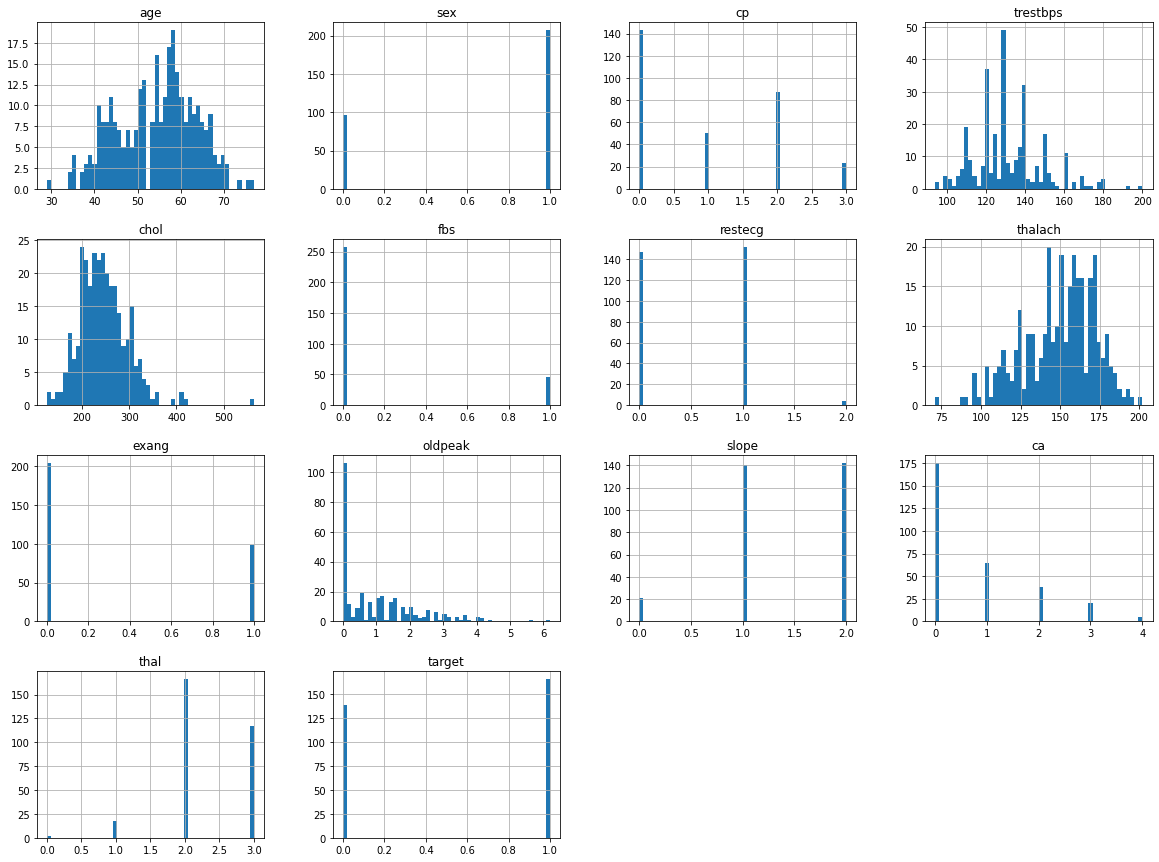

In [287]:
df.hist(bins=50,figsize=((20,15)))

EDA

In [288]:
fig = px.histogram(data_frame = df,
             x = "sex",
             color="target", title="<b>age vs target</b>",   
)
fig.show()

In [289]:
fig = px.histogram(data_frame = df,
             x = "fbs",
             color="target", title="<b>fbs vs target</b>",   
)
fig.show()

In [290]:
fig = px.histogram(data_frame = df,
             x = "chol",
             color="target", title="<b>chol vs target</b>",   
)
fig.show()

In [291]:
fig = px.histogram(data_frame = df,
             x = "ca",
             color="target", title="<b>ca vs target</b>",   
)
fig.show()

In [292]:
fig = px.histogram(data_frame = df,
             x = "age",
             color="sex", title="<b>age vs sex</b>",   
)
fig.show()

In [293]:
train_dict

,Data types,null,unique vals,count
age,int64,0,41,303
sex,int64,0,2,303
cp,int64,0,4,303
trestbps,int64,0,49,303
chol,int64,0,152,303
fbs,int64,0,2,303
restecg,int64,0,3,303
thalach,int64,0,91,303
exang,int64,0,2,303
oldpeak,float64,0,40,303


In [294]:
df.shape

(303, 14)

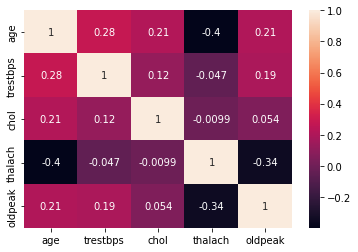

In [295]:
corrMatrix = df[numerical].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Preprocessing

In [296]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [297]:
y=df.target
df.drop('target',1,inplace=True)

In [298]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3)

In [299]:
model = [DecisionTreeClassifier(),RandomForestClassifier(), ExtraTreesClassifier() , XGBClassifier(),GaussianNB(),KNeighborsClassifier()]

In [300]:
trainAccuracy = list()
testAccuracy = list()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

for mdl in model:
    trainResult = cross_val_score(mdl, X_train, y_train, scoring='accuracy', cv=kfold)
    trainAccuracy.append(trainResult.mean())
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    testResult = metrics.accuracy_score(y_test, y_pred)
    testAccuracy.append(testResult)

In [301]:
print('The comparision\n')
modelScore = pd.DataFrame({'Model' : model, 'Train_Accuracy' : trainAccuracy, 'Test_Accuracy' : testAccuracy})
modelScore

The comparision



,Model,Train_Accuracy,Test_Accuracy
0,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.725974,0.758242
1,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.844156,0.802198
2,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",0.853030,0.791209
3,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.792641,0.780220
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.830303,0.813187
5,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.618615,0.659341


ExtraTreeClassifier

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        40
           1       0.88      0.86      0.87        51

    accuracy                           0.86        91
   macro avg       0.85      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



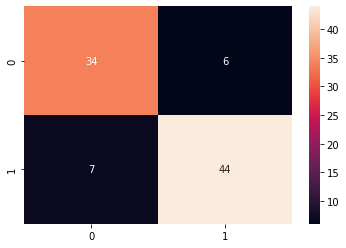

In [310]:
print('ExtraTreeClassifier\n')
model = ExtraTreesClassifier(n_estimators=200,max_depth=150)
model.fit(X_train, y_train)

pred = model.predict(X_test)
print(metrics.classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred), annot=True, fmt='d')
plt.show()
